In [1]:
import os
os.environ['THEANO_FLAGS']='device=gpu'

import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_keras_cv_predict,plot_roc

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
Using gpu device 0: GeForce GTX 670 (CNMeM is disabled, CuDNN 4007)
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
x,y=load_data(hla_representation='one-hot',seq_representation='one-hot')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 1.97542619705 s


### Create functions for cross validation

In [3]:
#create a very simple deepish model
from keras.models import Sequential
from keras.layers import Dense

def get_model(input_dim):
    """Creates Keras model needed."""
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim,activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

#train
y_pred=my_keras_cv_predict(get_model,x,y,n_folds=5,patience=3,verbose=2)

Train on 60300 samples, validate on 6700 samples
Epoch 1/100
2s - loss: 0.6107 - val_loss: 0.5508
Epoch 00000: val_loss improved from inf to 0.55078, saving model to best_model
Epoch 2/100
2s - loss: 0.4949 - val_loss: 0.4936
Epoch 00001: val_loss improved from 0.55078 to 0.49360, saving model to best_model
Epoch 3/100
2s - loss: 0.4125 - val_loss: 0.4925
Epoch 00002: val_loss improved from 0.49360 to 0.49248, saving model to best_model
Epoch 4/100
2s - loss: 0.3538 - val_loss: 0.4892
Epoch 00003: val_loss improved from 0.49248 to 0.48915, saving model to best_model
Epoch 5/100
2s - loss: 0.3019 - val_loss: 0.4787
Epoch 00004: val_loss improved from 0.48915 to 0.47873, saving model to best_model
Epoch 6/100
2s - loss: 0.2555 - val_loss: 0.5181
Epoch 00005: val_loss did not improve
Epoch 7/100
2s - loss: 0.2108 - val_loss: 0.5839
Epoch 00006: val_loss did not improve
Epoch 8/100
2s - loss: 0.1731 - val_loss: 0.6328
Epoch 00007: val_loss did not improve
Epoch 9/100
2s - loss: 0.1431 - va

AUC: 0.85737397851


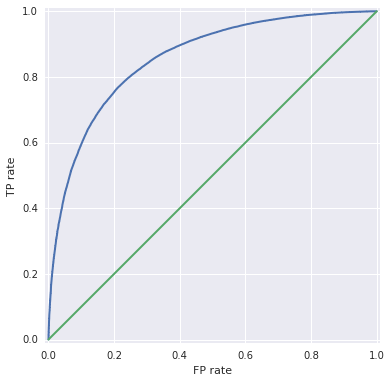

In [5]:
plot_roc(y,y_pred)